In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Lufthansa/Lufthansa(SKG_CDG).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,16:00:00,23:40:00,1,3,0,2,0,111,409.81
1,08:15:00,15:00:00,1,3,1,1,0,110,410.98
2,17:30:00,23:40:00,1,3,2,1,0,440,457.98
3,15:35:00,13:30:00,1,3,1,1,1,110,460.17
4,08:15:00,18:25:00,1,3,1,2,0,111,466.36


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 9 columns):
departure_time      3850 non-null object
arrival_time        3850 non-null object
days_before         3850 non-null int64
day_of_week         3850 non-null int64
num_of_luggage      3850 non-null int64
num_of_stops        3850 non-null int64
overnight_flight    3850 non-null int64
Class               3850 non-null int64
price               3850 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 270.8+ KB


In [7]:
df.shape

(3850, 9)

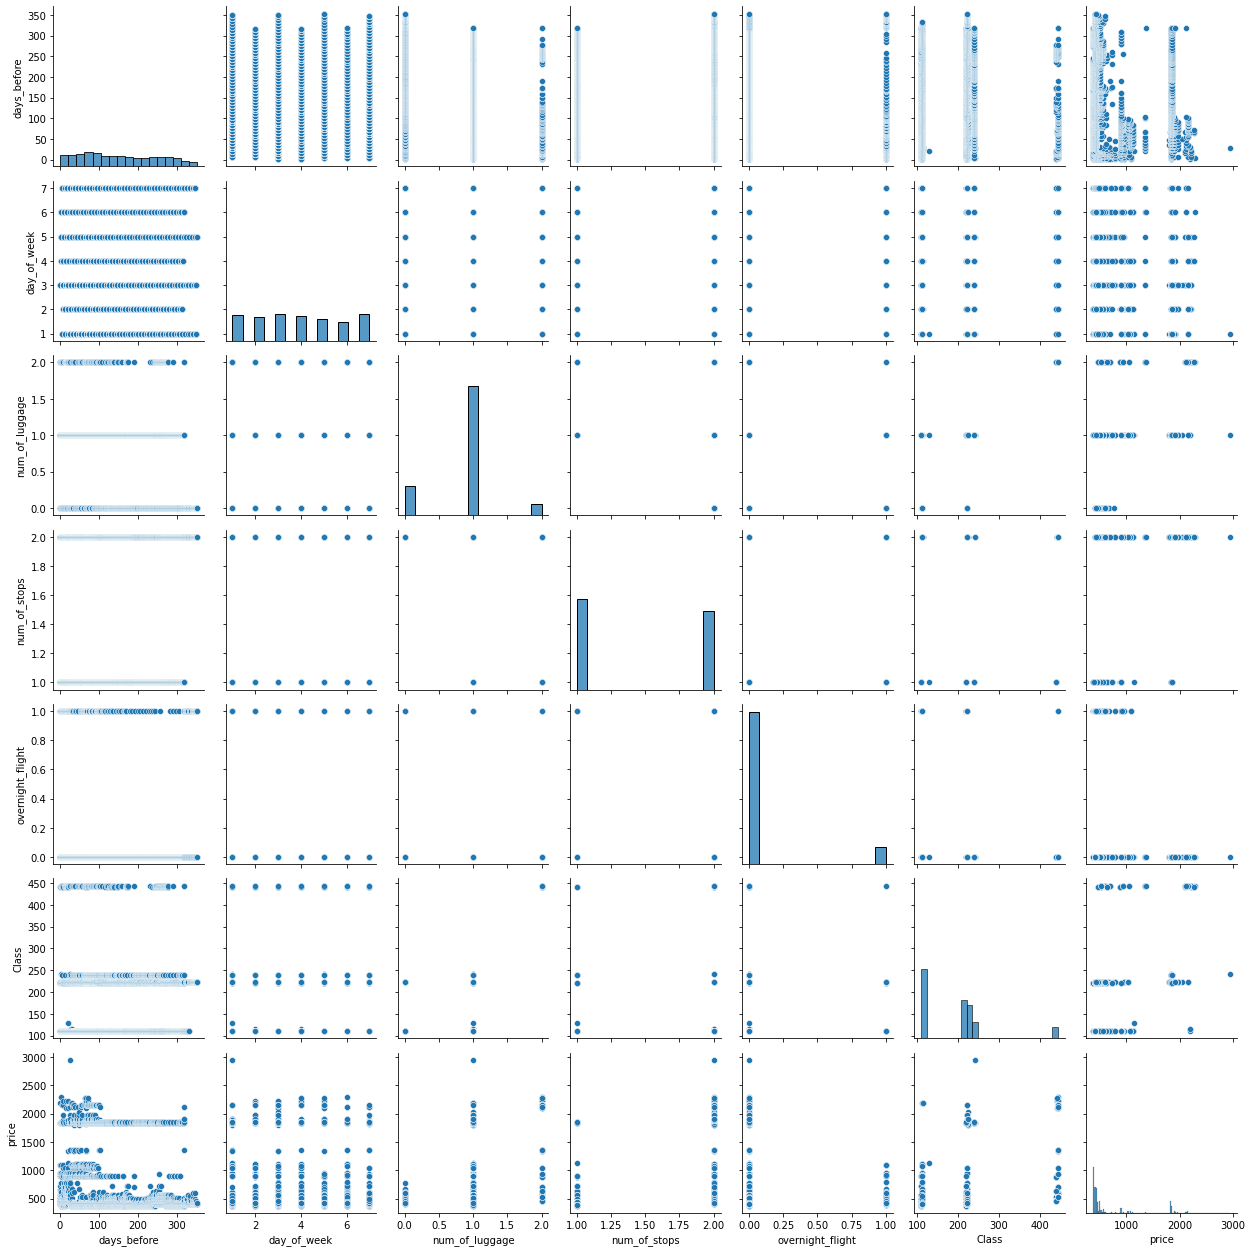

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 16:00:00,1900-01-01 23:40:00,1,3,0,2,0,111,409.81
1,1900-01-01 08:15:00,1900-01-01 15:00:00,1,3,1,1,0,110,410.98
2,1900-01-01 17:30:00,1900-01-01 23:40:00,1,3,2,1,0,440,457.98
3,1900-01-01 15:35:00,1900-01-01 13:30:00,1,3,1,1,1,110,460.17
4,1900-01-01 08:15:00,1900-01-01 18:25:00,1,3,1,2,0,111,466.36


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 16:00:00,1900-01-01 23:40:00,1,3,0,2,0,111,409.81,-2208931200000000000,-2208903600000000000
1,1900-01-01 08:15:00,1900-01-01 15:00:00,1,3,1,1,0,110,410.98,-2208959100000000000,-2208934800000000000
2,1900-01-01 17:30:00,1900-01-01 23:40:00,1,3,2,1,0,440,457.98,-2208925800000000000,-2208903600000000000
3,1900-01-01 15:35:00,1900-01-01 13:30:00,1,3,1,1,1,110,460.17,-2208932700000000000,-2208940200000000000
4,1900-01-01 08:15:00,1900-01-01 18:25:00,1,3,1,2,0,111,466.36,-2208959100000000000,-2208922500000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,3,1,0,2,0,111,409.81
1,3,1,1,1,0,110,410.98
2,3,1,2,1,0,440,457.98
3,3,1,1,1,1,110,460.17
4,3,1,1,2,0,111,466.36


In [21]:
df.to_csv('skg_cdg_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6757312522185455


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8648746954331838


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8656032264034743


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8687963681960511


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7579015177353869


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.868795776687973


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.16879382530457665


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.1916986545693733


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
97/97 [==============================] - 3s 5ms/step - loss: 357070.5938 - val_loss: 225059.4688
Epoch 2/200
97/97 [==============================] - 0s 3ms/step - loss: 291264.3438 - val_loss: 272924.2188
Epoch 3/200
97/97 [==============================] - 0s 3ms/step - loss: 284847.0000 - val_loss: 259604.7812
Epoch 4/200
97/97 [==============================] - 0s 3ms/step - loss: 286744.2812 - val_loss: 156473.9688
Epoch 5/200
97/97 [==============================] - 0s 3ms/step - loss: 285467.9375 - val_loss: 245666.2031
Epoch 6/200
97/97 [==============================] - 0s 3ms/step - loss: 283115.7188 - val_loss: 182359.4375
Epoch 7/200
97/97 [==============================] - 0s 3ms/step - loss: 284118.8438 - val_loss: 240542.9688
Epoch 8/200
97/97 [==============================] - 0s 3ms/step - loss: 279902.9688 - val_loss: 200600.3281
Epoch 9/200
97/97 [==============================] - 0s 3ms/step - loss: 279017.8438 - val_loss: 166364.0781
Epoch 10/200
97/97 

Epoch 76/200
97/97 [==============================] - 0s 4ms/step - loss: 110091.6641 - val_loss: 77655.4766
Epoch 77/200
97/97 [==============================] - 0s 4ms/step - loss: 95058.0547 - val_loss: 68788.9062
Epoch 78/200
97/97 [==============================] - 0s 4ms/step - loss: 93146.5547 - val_loss: 62945.1836
Epoch 79/200
97/97 [==============================] - 0s 4ms/step - loss: 94612.8906 - val_loss: 59401.5703
Epoch 80/200
97/97 [==============================] - 0s 4ms/step - loss: 134834.6562 - val_loss: 90147.4219
Epoch 81/200
97/97 [==============================] - 0s 4ms/step - loss: 98336.3750 - val_loss: 74647.6172
Epoch 82/200
97/97 [==============================] - 0s 4ms/step - loss: 92514.6406 - val_loss: 63792.0469
Epoch 83/200
97/97 [==============================] - 0s 4ms/step - loss: 95554.8047 - val_loss: 78352.5078
Epoch 84/200
97/97 [==============================] - 0s 4ms/step - loss: 87403.6328 - val_loss: 58434.7500
Epoch 85/200
97/97 [======

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.3998229901696744


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
97/97 [==============================] - 1s 6ms/step - loss: 452306.3125 - val_loss: 272447.8125
Epoch 2/200
97/97 [==============================] - 0s 4ms/step - loss: 285014.4062 - val_loss: 300701.0938
Epoch 3/200
97/97 [==============================] - 0s 4ms/step - loss: 283467.3125 - val_loss: 228366.4375
Epoch 4/200
97/97 [==============================] - 0s 4ms/step - loss: 282738.2500 - val_loss: 315547.1250
Epoch 5/200
97/97 [==============================] - 0s 4ms/step - loss: 282823.8125 - val_loss: 191408.6719
Epoch 6/200
97/97 [==============================] - 0s 4ms/step - loss: 284221.3750 - val_loss: 236902.2500
Epoch 7/200
97/97 [==============================] - 0s 4ms/step - loss: 283861.4375 - val_loss: 212953.2031
Epoch 8/200
97/97 [==============================] - 0s 4ms/step - loss: 279649.3750 - val_loss: 153623.5000
Epoch 9/200
97/97 [==============================] - 0s 4ms/step - loss: 281012.6562 - val_loss: 182928.2031
Epoch 10/200
97/97 

97/97 [==============================] - 0s 4ms/step - loss: 101296.3047 - val_loss: 42021.4883
Epoch 150/200
97/97 [==============================] - 0s 4ms/step - loss: 99746.1641 - val_loss: 168698.2344
Epoch 151/200
97/97 [==============================] - 0s 4ms/step - loss: 105868.9844 - val_loss: 65071.1367
Epoch 152/200
97/97 [==============================] - 0s 4ms/step - loss: 108884.1172 - val_loss: 81689.2188
Epoch 153/200
97/97 [==============================] - 0s 4ms/step - loss: 97683.8984 - val_loss: 66138.2734
Epoch 154/200
97/97 [==============================] - 0s 4ms/step - loss: 102492.9531 - val_loss: 75782.5469
Epoch 155/200
97/97 [==============================] - 0s 4ms/step - loss: 131611.9531 - val_loss: 147074.3281
Epoch 156/200
97/97 [==============================] - 0s 4ms/step - loss: 98575.8750 - val_loss: 78217.8984
Epoch 157/200
97/97 [==============================] - 0s 4ms/step - loss: 98414.2656 - val_loss: 67961.0547
Epoch 158/200
97/97 [=====

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.7264956559589093


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
97/97 [==============================] - 1s 5ms/step - loss: 377397.6562 - val_loss: 169236.2969
Epoch 2/200
97/97 [==============================] - 0s 4ms/step - loss: 282173.6250 - val_loss: 251770.6250
Epoch 3/200
97/97 [==============================] - 0s 4ms/step - loss: 283487.6875 - val_loss: 235390.2188
Epoch 4/200
97/97 [==============================] - 0s 4ms/step - loss: 284959.5312 - val_loss: 206882.8750
Epoch 5/200
97/97 [==============================] - 0s 4ms/step - loss: 286470.2812 - val_loss: 186556.2188
Epoch 6/200
97/97 [==============================] - 0s 4ms/step - loss: 283436.2500 - val_loss: 174071.7969
Epoch 7/200
97/97 [==============================] - 0s 4ms/step - loss: 281506.0000 - val_loss: 170717.6250
Epoch 8/200
97/97 [==============================] - 0s 4ms/step - loss: 282235.0625 - val_loss: 234637.9219
Epoch 9/200
97/97 [==============================] - 0s 4ms/step - loss: 278903.4688 - val_loss: 278210.2500
Epoch 10/200
97/97 

Epoch 150/200
97/97 [==============================] - 0s 4ms/step - loss: 88097.7109 - val_loss: 115881.7109
Epoch 151/200
97/97 [==============================] - 0s 4ms/step - loss: 88136.6328 - val_loss: 109561.9531
Epoch 152/200
97/97 [==============================] - 0s 4ms/step - loss: 85451.8672 - val_loss: 76796.4141
Epoch 153/200
97/97 [==============================] - 0s 4ms/step - loss: 85496.3516 - val_loss: 76461.7344
Epoch 154/200
97/97 [==============================] - 0s 4ms/step - loss: 83077.2578 - val_loss: 59623.5625
Epoch 155/200
97/97 [==============================] - 0s 4ms/step - loss: 86112.3281 - val_loss: 107951.4062
Epoch 156/200
97/97 [==============================] - 0s 4ms/step - loss: 86063.7578 - val_loss: 90422.8125
Epoch 157/200
97/97 [==============================] - 0s 4ms/step - loss: 83192.8906 - val_loss: 48474.1680
Epoch 158/200
97/97 [==============================] - 0s 4ms/step - loss: 83443.9375 - val_loss: 356965.7812
Epoch 159/200
9

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
97/97 [==============================] - 1s 6ms/step - loss: 331656.7500 - val_loss: 248261.1562
Epoch 2/200
97/97 [==============================] - 0s 4ms/step - loss: 288365.0625 - val_loss: 242345.6562
Epoch 3/200
97/97 [==============================] - 0s 4ms/step - loss: 290193.7188 - val_loss: 179860.6406
Epoch 4/200
97/97 [==============================] - 0s 4ms/step - loss: 290461.0000 - val_loss: 284405.4375
Epoch 5/200
97/97 [==============================] - 0s 4ms/step - loss: 288949.9688 - val_loss: 135606.9531
Epoch 6/200
97/97 [==============================] - 0s 4ms/step - loss: 289471.2812 - val_loss: 181906.5781
Epoch 7/200
97/97 [==============================] - 0s 4ms/step - loss: 281687.4688 - val_loss: 219042.1875
Epoch 8/200
97/97 [==============================] - 0s 4ms/step - loss: 281688.4688 - val_loss: 184755.2969
Epoch 9/200
97/97 [==============================] - 0s 4ms/step - loss: 278323.3125 - val_loss: 176258.5938
Epoch 10/200
97/97 

Epoch 76/200
97/97 [==============================] - 0s 4ms/step - loss: 90117.5234 - val_loss: 62837.0742
Epoch 77/200
97/97 [==============================] - 0s 4ms/step - loss: 87037.9219 - val_loss: 49739.0703
Epoch 78/200
97/97 [==============================] - 0s 4ms/step - loss: 96882.4609 - val_loss: 58100.3125
Epoch 79/200
97/97 [==============================] - 0s 4ms/step - loss: 82634.7812 - val_loss: 44621.7695
Epoch 80/200
97/97 [==============================] - 0s 4ms/step - loss: 83506.6406 - val_loss: 34865.1641
Epoch 81/200
97/97 [==============================] - 0s 4ms/step - loss: 82790.4922 - val_loss: 53316.3047
Epoch 82/200
97/97 [==============================] - 0s 4ms/step - loss: 89993.9844 - val_loss: 82986.2578
Epoch 83/200
97/97 [==============================] - 0s 4ms/step - loss: 94474.8906 - val_loss: 105013.3828
Epoch 84/200
97/97 [==============================] - 0s 4ms/step - loss: 93165.4219 - val_loss: 35892.6367
Epoch 85/200
97/97 [=======

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
97/97 [==============================] - 1s 6ms/step - loss: 407896.5312 - val_loss: 210331.9062
Epoch 2/200
97/97 [==============================] - 0s 4ms/step - loss: 285923.7812 - val_loss: 201320.4375
Epoch 3/200
97/97 [==============================] - 0s 4ms/step - loss: 282541.5000 - val_loss: 240751.9375
Epoch 4/200
97/97 [==============================] - 0s 4ms/step - loss: 281117.3125 - val_loss: 173495.4062
Epoch 5/200
97/97 [==============================] - 0s 4ms/step - loss: 280447.0312 - val_loss: 186330.7031
Epoch 6/200
97/97 [==============================] - 0s 4ms/step - loss: 282481.5312 - val_loss: 218458.0312
Epoch 7/200
97/97 [==============================] - 0s 4ms/step - loss: 280976.6875 - val_loss: 182031.5156
Epoch 8/200
97/97 [==============================] - 0s 4ms/step - loss: 279996.0625 - val_loss: 247705.3125
Epoch 9/200
97/97 [==============================] - 0s 4ms/step - loss: 275117.5938 - val_loss: 164975.7969
Epoch 10/200
97/97 

97/97 [==============================] - 0s 4ms/step - loss: 117667.6250 - val_loss: 73117.8516
Epoch 150/200
97/97 [==============================] - 0s 4ms/step - loss: 127453.6953 - val_loss: 70405.0938
Epoch 151/200
97/97 [==============================] - 0s 4ms/step - loss: 111218.6250 - val_loss: 82010.7812
Epoch 152/200
97/97 [==============================] - 0s 4ms/step - loss: 121332.6875 - val_loss: 82664.9297
Epoch 153/200
97/97 [==============================] - 0s 4ms/step - loss: 125009.1328 - val_loss: 73233.4609
Epoch 154/200
97/97 [==============================] - 0s 4ms/step - loss: 154503.8438 - val_loss: 70220.5781
Epoch 155/200
97/97 [==============================] - 0s 4ms/step - loss: 218171.7812 - val_loss: 95304.7578
Epoch 156/200
97/97 [==============================] - 0s 4ms/step - loss: 179165.0938 - val_loss: 94893.5000
Epoch 157/200
97/97 [==============================] - 0s 4ms/step - loss: 117750.5312 - val_loss: 85293.3125
Epoch 158/200
97/97 [===

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
97/97 [==============================] - 1s 7ms/step - loss: 323508.7500 - val_loss: 158326.5625
Epoch 2/200
97/97 [==============================] - 0s 4ms/step - loss: 302159.7812 - val_loss: 165128.5625
Epoch 3/200
97/97 [==============================] - 0s 4ms/step - loss: 288993.7500 - val_loss: 187795.1094
Epoch 4/200
97/97 [==============================] - 0s 4ms/step - loss: 289119.8750 - val_loss: 193111.1875
Epoch 5/200
97/97 [==============================] - 0s 4ms/step - loss: 281616.8125 - val_loss: 182738.9062
Epoch 6/200
97/97 [==============================] - 0s 4ms/step - loss: 282136.3438 - val_loss: 174419.7344
Epoch 7/200
97/97 [==============================] - 0s 4ms/step - loss: 280074.0625 - val_loss: 209373.9219
Epoch 8/200
97/97 [==============================] - 0s 4ms/step - loss: 278543.5938 - val_loss: 180733.0938
Epoch 9/200
97/97 [==============================] - 0s 4ms/step - loss: 270468.3125 - val_loss: 135874.2656
Epoch 10/200
97/97 

Epoch 76/200
97/97 [==============================] - 0s 4ms/step - loss: 172681.9062 - val_loss: 69178.9688
Epoch 77/200
97/97 [==============================] - 0s 4ms/step - loss: 164841.5781 - val_loss: 83673.4141
Epoch 78/200
97/97 [==============================] - 0s 4ms/step - loss: 175053.8125 - val_loss: 96976.3672
Epoch 79/200
97/97 [==============================] - 0s 4ms/step - loss: 153648.3281 - val_loss: 69521.3125
Epoch 80/200
97/97 [==============================] - 0s 4ms/step - loss: 151764.6406 - val_loss: 68151.4766
Epoch 81/200
97/97 [==============================] - 0s 4ms/step - loss: 153958.8125 - val_loss: 79824.2266
Epoch 82/200
97/97 [==============================] - 0s 5ms/step - loss: 127482.1406 - val_loss: 60893.6680
Epoch 83/200
97/97 [==============================] - 0s 4ms/step - loss: 117530.3047 - val_loss: 65966.6016
Epoch 84/200
97/97 [==============================] - 0s 4ms/step - loss: 96646.6484 - val_loss: 40936.6836
Epoch 85/200
97/97 [

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.676
1,Bagging,0.865
2,Gradient Boosting,0.866
3,Decision Tree,0.869
4,Random Forest,0.758
5,Extra Tree,0.869
6,SVR,0.168
7,MLP,0.194
8,VGG11,0.400
9,VGG13,0.726


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

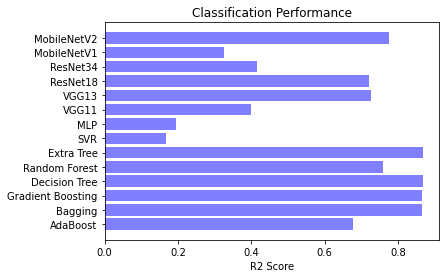

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()